In [18]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import os
import sys

In [19]:
df_credit = pd.read_csv('../data/credit_card.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
ip_data = pd.read_csv('../data/ipAddress_to_Country.csv')
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [21]:
df_fraud = pd.read_csv('../data/fraud_Data.csv')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


C:\Users\hp\AppData\Local\Temp\ipykernel_31084\1786203388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_fraud, palette="coolwarm")


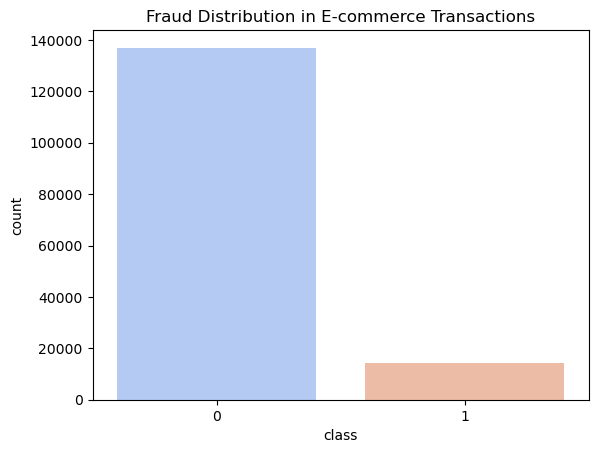

In [22]:
# Plot fraud distribution for e-commerce dataset
sns.countplot(x='class', data=df_fraud, palette="coolwarm")
plt.title("Fraud Distribution in E-commerce Transactions")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_31084\1735635158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_credit, palette="coolwarm")


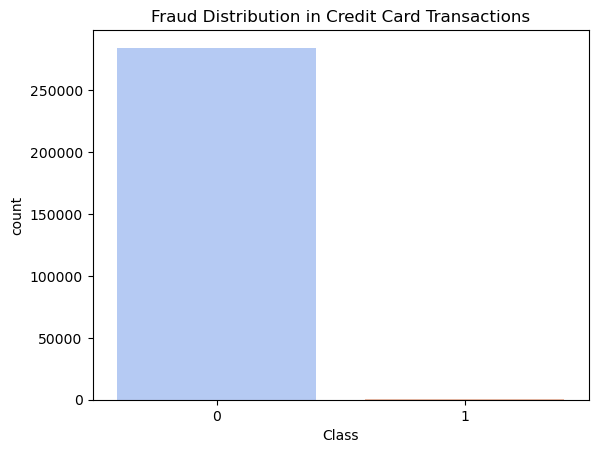

In [23]:

# Plot fraud distribution for credit card dataset
sns.countplot(x='Class', data=df_credit, palette="coolwarm")
plt.title("Fraud Distribution in Credit Card Transactions")
plt.show()

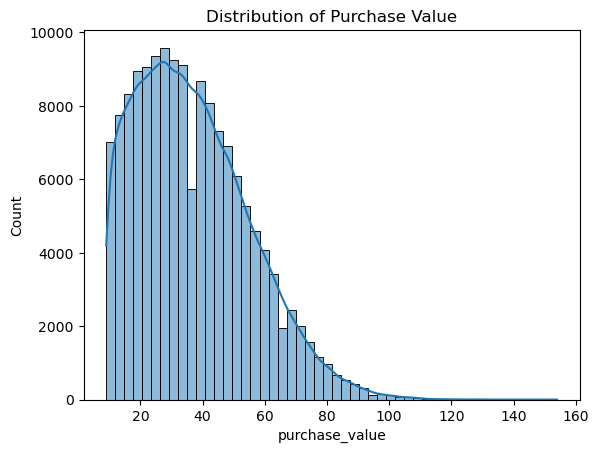

In [24]:
# Plot distribution of purchase_value
sns.histplot(df_fraud['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()

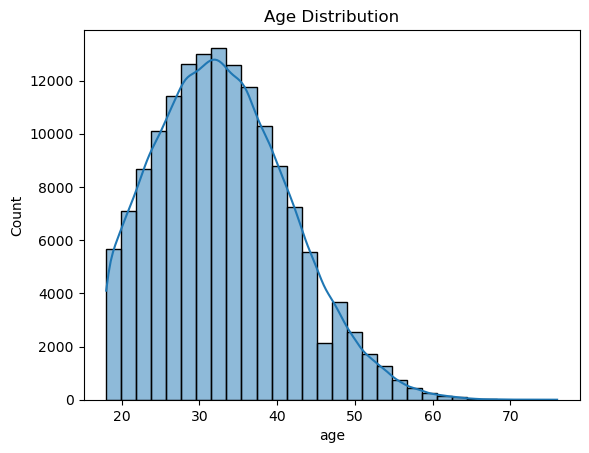

In [25]:
# Plot age distribution
sns.histplot(df_fraud['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

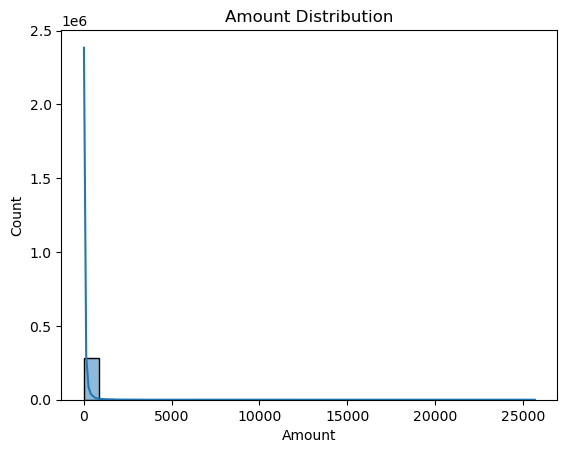

In [26]:
# Plot age distribution
sns.histplot(df_credit['Amount'], bins=30, kde=True)
plt.title("Amount Distribution")
plt.show()

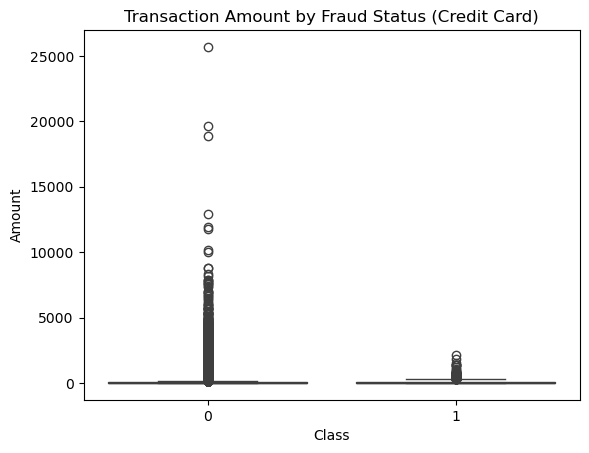

In [27]:
# Plot transaction amount for credit card dataset
sns.boxplot(x='Class', y='Amount', data=df_credit)
plt.title("Transaction Amount by Fraud Status (Credit Card)")
plt.show()

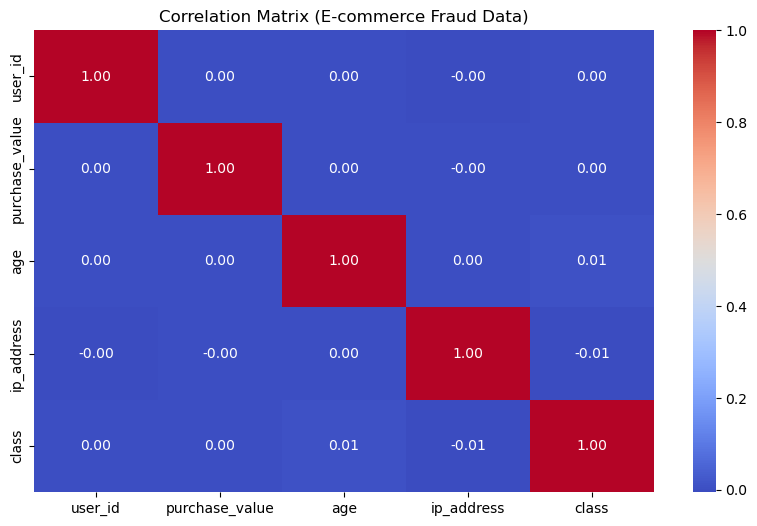

In [28]:
# Correlation matrix for e-commerce dataset
numeric_data = df_fraud.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (E-commerce Fraud Data)")
plt.show()


In [29]:
# Select only numeric columns
numeric_data = df_fraud.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr().abs()
print(corr_matrix)

                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002617  0.000611    0.003144  0.001945
purchase_value  0.002617        1.000000  0.002370    0.000328  0.001011
age             0.000611        0.002370  1.000000    0.001140  0.006624
ip_address      0.003144        0.000328  0.001140    1.000000  0.005208
class           0.001945        0.001011  0.006624    0.005208  1.000000


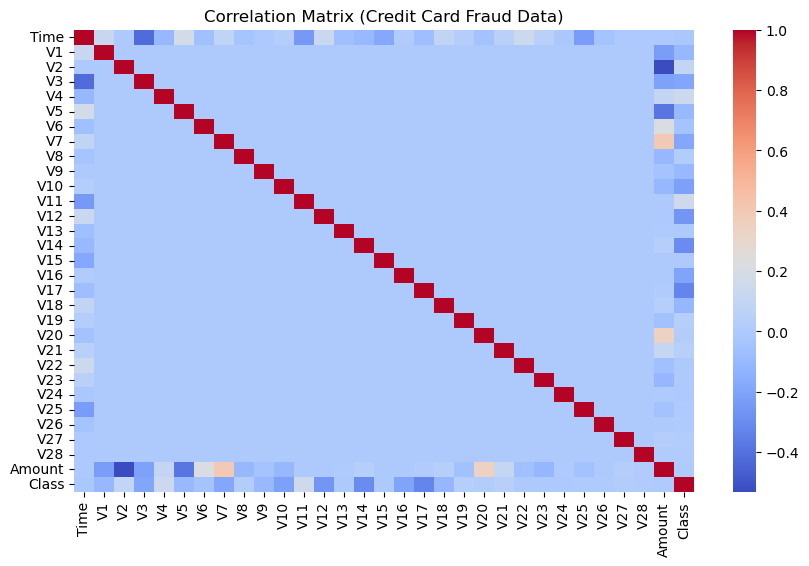

In [30]:
# Correlation matrix for credit card dataset (PCA features)
plt.figure(figsize=(10,6))
sns.heatmap(df_credit.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Credit Card Fraud Data)")
plt.show()

In [31]:
# Select only numeric columns
numeric_data = df_credit.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr().abs()
print(corr_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01  1.059333e-02  4.196182e-01  1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16  1.227819e-15  9.215150e-16   
V2      0.010593  4.135835e-16  1.000000e+00  3.243764e-16  1.121065e-15   
V3      0.419618  1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4      0.105260  9.215150e-16  1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16  6.539009e-17  1.719944e-15   
V6      0.063016  6.506567e-16  2.787346e-16  1.627627e-15  7.491959e-16   
V7      0.084714  1.005191e-15  2.055934e-16  4.895305e-16  4.104503e-16   
V8      0.036949  2.433822e-16  5.377041e-17  1.268779e-15  5.697192e-16   
V9      0.008660  1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17  3.991394e-16  1.156587e-15  2.232685e-16   
V11     0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

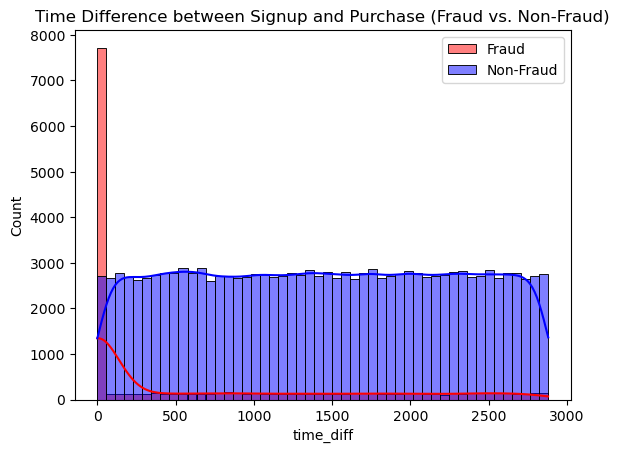

In [32]:
##Time Based Analysis
# Convert timestamps to datetime
df_fraud["signup_time"] = pd.to_datetime(df_fraud["signup_time"])
df_fraud["purchase_time"] = pd.to_datetime(df_fraud["purchase_time"])

# Compute time difference
df_fraud["time_diff"] = (df_fraud["purchase_time"] - df_fraud["signup_time"]).dt.total_seconds() / 3600

# Plot fraud vs. time difference
sns.histplot(df_fraud[df_fraud["class"] == 1]["time_diff"], bins=50, kde=True, color="red", label="Fraud")
sns.histplot(df_fraud[df_fraud["class"] == 0]["time_diff"], bins=50, kde=True, color="blue", label="Non-Fraud")
plt.legend()
plt.title("Time Difference between Signup and Purchase (Fraud vs. Non-Fraud)")
plt.show()


In [33]:
df_fraud['ip_address'] = df_fraud['ip_address'].apply(lambda x: int(x))  # if your IPs are floats
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(lambda x: int(x))

In [ ]:
##Geolocation Analysis
# Convert IP address strings to integer format
def convert_ip(ip):
    try:
        return int(ipaddress.ip_address(str(ip)))  # Convert IP to integer safely
    except ValueError:
        return None  # Return None for invalid IPs

# Apply the conversion and drop invalid IPs
df_fraud["ip_int"] = df_fraud["ip_address"].apply(convert_ip)
df_fraud = df_fraud.dropna(subset=["ip_int"])
df_fraud["ip_int"] = df_fraud["ip_int"].astype(int)  # Ensure integer type

# Ensure IP data columns are also integers
ip_data["lower_bound_ip_address"] = ip_data["lower_bound_ip_address"].astype(int)
ip_data["upper_bound_ip_address"] = ip_data["upper_bound_ip_address"].astype(int)

# Ensure IP data is sorted for merging
ip_data = ip_data.sort_values("lower_bound_ip_address")

# Perform an asof merge to match IPs within the range
df_fraud = pd.merge_asof(
    df_fraud.sort_values("ip_int"),
    ip_data,
    left_on="ip_int",
    right_on="lower_bound_ip_address",
    direction="backward"
)

# Keep only rows where the IP falls within the upper_bound range
df_fraud = df_fraud[df_fraud["ip_int"] <= df_fraud["upper_bound_ip_address"]]

# Save the merged dataset
df_fraud.to_csv("Merged_Fraud_Data.csv", index=False)

print("Merging completed! File saved as 'Merged_Fraud_Data.csv'.")


Merging completed! File saved as 'Merged_Fraud_Data.csv'.


In [7]:
# Convert IP addresses to integer format
def convert_ip(ip):
    try:
        return int(ipaddress.ip_address(str(ip)))
    except ValueError:
        return None

df_fraud["ip_int"] = df_fraud["ip_address"].apply(convert_ip)
df_fraud = df_fraud.dropna(subset=["ip_int"])
df_fraud["ip_int"] = df_fraud["ip_int"].astype(int)

# Convert IP range columns to integers
ip_data["lower_bound_ip_address"] = ip_data["lower_bound_ip_address"].astype(int)
ip_data["upper_bound_ip_address"] = ip_data["upper_bound_ip_address"].astype(int)

# Ensure IP data is sorted for efficient merging
ip_data = ip_data.sort_values("lower_bound_ip_address")

# Perform an asof merge to match IPs within the range
df_fraud = pd.merge_asof(
    df_fraud.sort_values("ip_int"),
    ip_data,
    left_on="ip_int",
    right_on="lower_bound_ip_address",
    direction="backward"
)

# Keep only valid IP matches (ensuring they fall within range)
df_fraud = df_fraud[df_fraud["ip_int"] <= df_fraud["upper_bound_ip_address"]]

# Debugging - Check if rows exist after merging
print(f"Rows after merging: {df_fraud.shape[0]}")

# Save the merged dataset
df_fraud.to_csv("Merged_Fraud_Data.csv", index=False)

print("Merging completed! File saved as 'Merged_fraud_data.csv'.")


Rows after merging: 0
Merging completed! File saved as 'Merged_fraud_data.csv'.


In [30]:
df_merged = pd.read_csv('../data/Merged_Fraud_Data.csv')
df_merged.head()

,user_id,purchase_value,age,ip_address,class,time_diff,source_Direct,source_SEO,sex_M,browser_FireFox,...,device_id_ZZZFMEPPCQVFV,device_id_ZZZGSIJRNCXBJ,device_id_ZZZIKLJSVSQMF,device_id_ZZZKJIZHJEDFN,device_id_ZZZMVOGBAJVTM,device_id_ZZZXASJUVUNMV,ip_int,lower_bound_ip_address,upper_bound_ip_address,country


In [ ]:

# Compute transaction count per user, device, and IP
df_fraud["user_txn_count"] = df_fraud.groupby("user_id")["user_id"].transform("count")
df_fraud["device_txn_count"] = df_fraud.groupby("device_id")["device_id"].transform("count")
df_fraud["ip_txn_count"] = df_fraud.groupby("ip_address")["ip_address"].transform("count")

# Compute time difference between signup and purchase (in hours)
df_fraud["signup_to_purchase_hrs"] = (df_fraud["purchase_time"] - df_fraud["signup_time"]).dt.total_seconds() / 3600

# Display new features
print(df_fraud[["user_txn_count", "device_txn_count", "ip_txn_count", "signup_to_purchase_hrs"]].head())


In [ ]:
# Extract hour and day of week from purchase_time
df_fraud["hour_of_day"] = df_fraud["purchase_time"].dt.hour
df_fraud["day_of_week"] = df_fraud["purchase_time"].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Display new time features
print(df_fraud[["hour_of_day", "day_of_week"]].head())

In [16]:
##Normalize & Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for scaling
num_features = ["purchase_value",'age']

# Apply StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_fraud[num_features] = scaler.fit_transform(df_fraud[num_features])

# Display scaled values
print(df_fraud[num_features].head())


   purchase_value       age
0       -0.160204  0.679914
1       -1.142592  2.304476
2       -1.197169  2.304476
3        0.385567  0.911994
4        0.112681  1.376155


In [20]:
##Encode Categorical Features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encode categorical variables
categorical_features = ["source", "sex", "browser",'device_id']
df_fraud = pd.get_dummies(df_fraud, columns=categorical_features, drop_first=True)

# Label Encode 'country' (if added during IP merging)
if "country" in df_fraud.columns:
    label_encoder = LabelEncoder()
    df_fraud["country"] = label_encoder.fit_transform(df_fraud["country"])

# Display transformed data
print(df_fraud.head())

   user_id  purchase_value       age    ip_address  class    time_diff  \
0    22058       -0.160204  0.679914  7.327584e+08      0  1251.856111   
1   333320       -1.142592  2.304476  3.503114e+08      0     4.984444   
2     1359       -1.197169  2.304476  2.621474e+09      1     0.000278   
3   150084        0.385567  0.911994  3.840542e+09      0   136.690278   
4   221365        0.112681  1.376155  4.155831e+08      0  1211.516944   

   source_Direct  source_SEO  sex_M  browser_FireFox  ...  \
0          False        True   True            False  ...   
1          False       False  False            False  ...   
2          False        True   True            False  ...   
3          False        True   True            False  ...   
4          False       False   True            False  ...   

   device_id_ZZYTQUKREXTLU  device_id_ZZYXERMSKABCQ  device_id_ZZZCCVFIRNYDB  \
0                    False                    False                    False   
1                    False  

In [18]:
##Feature Selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_fraud.drop(columns=['class','purchase_time','signup_time'])
y = df_fraud['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)

ValueError: could not convert string to float: 'LOCZVEUHAQZKQ'